In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
df = pd.read_excel("base_musical.xlsx")
df = df.drop(columns='Unnamed: 0')

In [3]:
media = df.mean(numeric_only=True)
mediana = df.median(numeric_only=True)

In [4]:
variancia = df.var(numeric_only=True)
dp = df.std(numeric_only=True)
coeficiente_variacao = dp / media

In [5]:
dfEstatisticas = df.copy()
dfEstatisticas.loc['Media'] = media
dfEstatisticas.loc['Mediana'] = mediana
dfEstatisticas.loc['Variancia'] = variancia
dfEstatisticas.loc['Desvio_Padrao'] = dp
dfEstatisticas.loc['Coeficiente_Variacao'] = coeficiente_variacao

In [6]:
dfEstatisticas

,artista,musica,dancabilidade,energia,chave,volume,presenca_palavras,acustica,instrumentalidade,ao_vivo,positividade,tempo,duracao_ms
0,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",0.621000,0.782000,2.000000,-5.548000,0.044000,0.012500,0.033000,0.230000,0.550000,128.033000,1.989380e+05
1,Harry Styles,As It Was,0.520000,0.731000,6.000000,-5.338000,0.055700,0.342000,0.001010,0.311000,0.662000,173.930000,1.673030e+05
2,Bad Bunny,Me Porto Bonito,0.911000,0.712000,1.000000,-5.105000,0.081700,0.090100,0.000027,0.093300,0.425000,92.005000,1.785670e+05
3,Bad Bunny,Tití Me Preguntó,0.650000,0.715000,5.000000,-5.198000,0.253000,0.099300,0.000291,0.126000,0.187000,106.672000,2.437170e+05
4,BLACKPINK,Pink Venom,0.798000,0.697000,0.000000,-7.139000,0.089100,0.020200,0.000000,0.259000,0.745000,90.031000,1.869640e+05
5,ROSALÍA,DESPECHÁ,0.919000,0.623000,7.000000,-6.521000,0.099200,0.184000,0.000016,0.060900,0.775000,130.037000,1.570180e+05
6,Bad Bunny,Efecto,0.801000,0.475000,7.000000,-8.797000,0.051600,0.141000,0.000017,0.063900,0.234000,98.047000,2.130610e+05
7,Manuel Turizo,La Bachata,0.835000,0.679000,7.000000,-5.329000,0.036400,0.583000,0.000002,0.218000,0.850000,124.980000,1.626380e+05
8,Kate Bush,Running Up That Hill (A Deal With God),0.629000,0.547000,10.000000,-13.123000,0.055000,0.720000,0.003140,0.060400,0.197000,108.375000,2.989330e+05
9,Bad Bunny,Ojitos Lindos,0.647000,0.686000,3.000000,-5.745000,0.041300,0.080000,0.000001,0.528000,0.268000,79.928000,2.582990e+05


array([[<AxesSubplot:title={'center':'dancabilidade'}>,
        <AxesSubplot:title={'center':'energia'}>,
        <AxesSubplot:title={'center':'chave'}>],
       [<AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'presenca_palavras'}>,
        <AxesSubplot:title={'center':'acustica'}>],
       [<AxesSubplot:title={'center':'instrumentalidade'}>,
        <AxesSubplot:title={'center':'ao_vivo'}>,
        <AxesSubplot:title={'center':'positividade'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duracao_ms'}>, <AxesSubplot:>]],
      dtype=object)

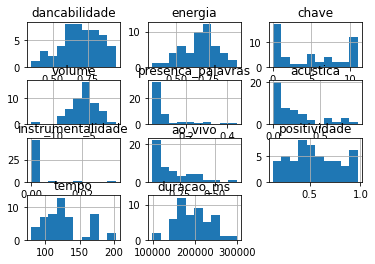

In [7]:
df.hist()

<AxesSubplot:>

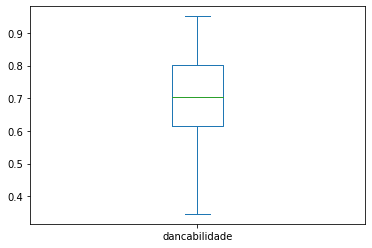

In [8]:
df['dancabilidade'].plot(kind = 'box')

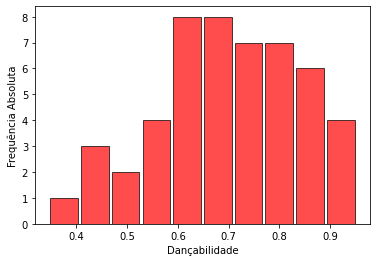

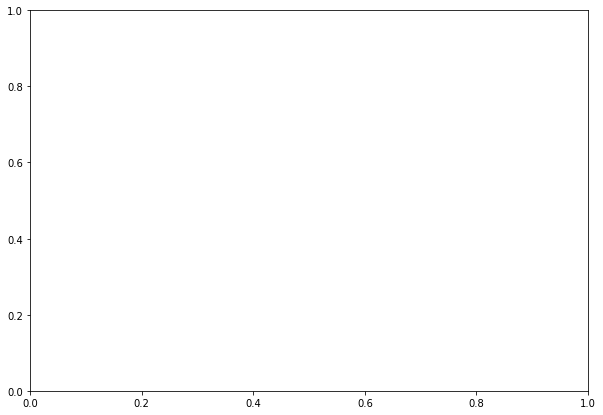

In [9]:
plt.hist(df['dancabilidade'], rwidth=0.9, color='red', alpha=0.7, edgecolor='black')
plt.xlabel('Dançabilidade')
plt.ylabel('Frequência Absoluta')
plt.subplots(figsize =(10, 7))
plt.show()

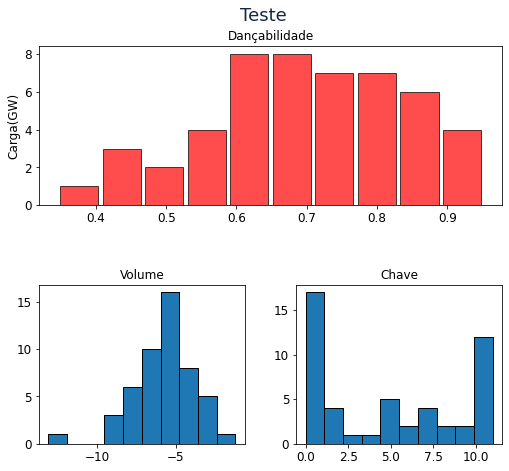

In [10]:
fig = plt.gcf()
fig.set_size_inches(8.3,11.7)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12
fig.text(
    x=0.5,
    y=0.91,
    s='Teste',
    fontsize = 18,
    horizontalalignment='center',
    color='#152747')
gs = gridspec.GridSpec(3, 2, hspace=0.5,wspace=0.25)
#SIN
plt.subplot(gs[0, :])
plt.hist(df['dancabilidade'], rwidth=0.9, color='red', alpha=0.7, edgecolor='black')
plt.title("Dançabilidade")
plt.ylabel('Carga(GW)')
# plt.grid(True)
# plt.legend(loc='upper center', fontsize=11)

# plt.annotate(
#     'teste',
#     xy=(mes,new_sin_load),
#     color='#143c5a',
#     fontsize = 10,
#     xytext=(0,-20),
#     textcoords='offset points'
# )
# for i, row in last_sin_load['antiga'].iterrows():
#     plt.annotate(
#         str(row['CARGA ANTIGA']),
#         xy=(row['DATA'],row['CARGA ANTIGA']),
#         color='#2fb3c3',
#         fontsize = 10,
#         xytext=(0,10),
#         textcoords='offset points'
#     )



plt.subplot(gs[1,0])
plt.hist(df['volume'], edgecolor='black')
plt.title('Volume')

plt.subplot(gs[1,1])
plt.hist(df['chave'], edgecolor='black')
plt.title('Chave')


# plt.subplot(gs[2,0])

# plt.subplot(gs[2,1])



# plt.savefig('graficos.png', format='png')
plt.show()




In [11]:
import numpy as np
p25, p50, p75 = np.percentile(df['dancabilidade'], [25, 50, 75])